In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np  

In [6]:
df = pd.DataFrame(np.arange(50))

In [22]:
# Set odd days to +3.0%
df.loc[df.index % 2 == 1, 'underlying_return'] = 0.03
# Set even days to -2.913%
df.loc[df.index % 2 == 0, 'underlying_return'] = -0.02913
df.head()

,0,underlying_return
0,0,-0.02913
1,1,0.03000
2,2,-0.02913
3,3,0.03000
4,4,-0.02913


In [27]:
# Calculate cumulative series
df['underlying_price'] = (df['underlying_return'] + 1).cumprod()
df.head()

,0,underlying_return,underlying_price
0,0,-0.02913,0.970870
1,1,0.03000,0.999996
2,2,-0.02913,0.970866
3,3,0.03000,0.999992
4,4,-0.02913,0.970862


In [29]:
# Inverse ETF
df['short_return'] = df['underlying_return'] * -1
df['short_price'] = (df['short_return'] + 1).cumprod()

# Double Inverse
df['double_short_return'] = df['underlying_return'] * -2
df['double_short_price'] = (df['double_short_return'] + 1).cumprod()


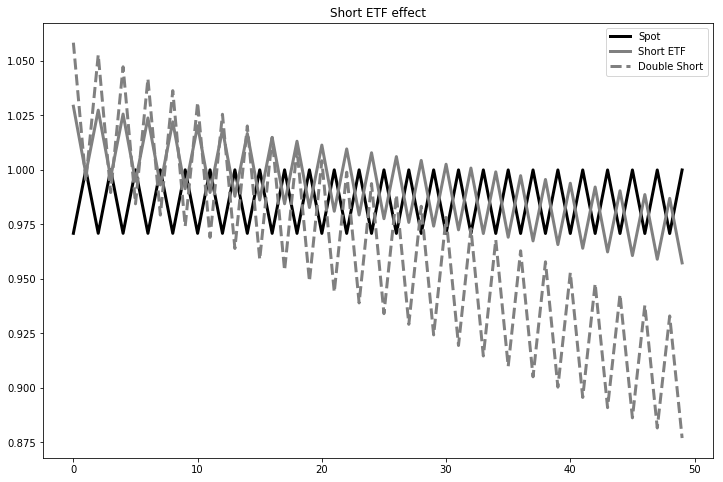

In [48]:
# Plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_title('Short ETF effect')
ax.plot(df['underlying_price'], label='Spot', linestyle='-', linewidth=3.0, color='black')
ax.plot(df['short_price'], label='Short ETF', linestyle='-', linewidth=3.0, color='grey')
ax.plot(df['double_short_price'], label='Double Short', linestyle='--', linewidth=3.0, color='grey')
ax.legend()